# Task 1 - ML Reconfiguration

In [ ]:
!unzip ml_reconfiguration.zip

Archive:  ml_reconfiguration.zip
  inflating: analysis.ows            
  inflating: points.csv              


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('points.csv').to_numpy()

df.shape

(21360, 2)

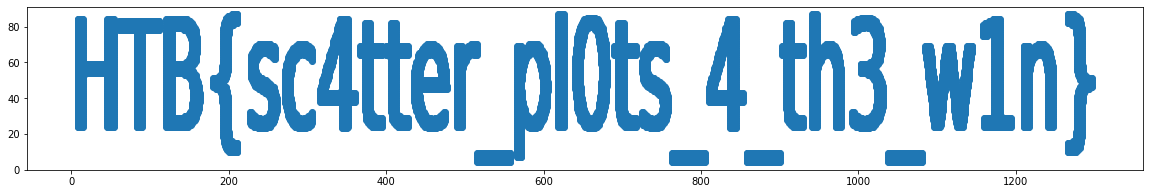

In [ ]:

plt.rcParams["figure.figsize"] = (20,3)

plt.scatter(df[:,0], df[:,1])

# Task 2 - ML Mysterious Learnings

In [ ]:
!unzip ml_mysterious_learnings.zip

Archive:  ml_mysterious_learnings.zip
  inflating: alien.h5                


In [ ]:
model = tf.keras.models.load_model('alien.h5')
model.summary()

SFRCe24wdF9zb
Model: "19oNHJkX3RvX3V"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 uZDNyc3Q0bmR9 (Lambda)      (None, 4,

In [ ]:
!echo SFRCe24wdF9zb19oNHJkX3RvX3VuZDNyc3Q0bmR9 | base64 -d

HTB{n0t_so_h4rd_to_und3rst4nd}

# Task 3 - Last Hope


In [ ]:
!unzip ml_last_hope.zip

Archive:  ml_last_hope.zip
  inflating: quantum_artifact.qasm   


In [ ]:
!pip install oqi qiskit

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram


simulator = QasmSimulator()
circuit = QuantumCircuit.from_qasm_file('quantum_artifact.qasm')
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()


In [ ]:
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

binary = next(iter(counts.keys()))

def decode_binary_string(s):
    return ''.join(chr(int(s[i*8:i*8+8],2)) for i in range(len(s)//8))

decode_binary_string(binary)


Total count for 00 and 11 are: {'01001000010101000100001001111011011000010101111101100111011011000011000101101101011100000111001100110011010111110011000001100110010111110110100000110000011100000011001101111101': 1000}


'HTB{a_gl1mps3_0f_h0p3}'

# Task 4 - On The Rescue

In [ ]:
!unzip ml_on_the_rescue.zip

Archive:  ml_on_the_rescue.zip
  inflating: architecture.py         
  inflating: bigram_model.pt         


In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torchsummary import summary

torch.manual_seed(1337)

vocab = list("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!#$%&'()*+,-./:;<=>?@[\]^_`{|}\n")
class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        logits = self.token_embedding_table(idx) 
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits
    


model = BigramLanguageModel(93)
model.load_state_dict(torch.load('bigram_model.pt'))

<All keys matched successfully>

In [ ]:
curr_idx = torch.tensor([43]) # Index of H in vocab
flag = 'H'
for i in range(50):
  ten = model(curr_idx)
  curr_idx = torch.argmax(ten)
  flag=flag+vocab[curr_idx]
  if vocab[curr_idx] == '}':
    break
    


In [ ]:
print(flag)

HTB{Pr0t3c7_L1fe}


# Task 5 - Vision Chip

In [ ]:
!7z x ml_vision_chip.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 19998914 bytes (20 MiB)

Extracting archive: ml_vision_chip.zip
--
Path = ml_vision_chip.zip
Type = zip
Physical Size = 19998914

  0%     68% 4 - ml_vision_chip/state_dict.pt                                     Everything is Ok

Folders: 1
Files: 5
Size:       25111703
Compressed: 19998914


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

from ml_vision_chip.model import EarthVisionModel

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        _dict = pickle.load(fo, encoding='bytes')
    return _dict

label_meta = unpickle("./ml_vision_chip/meta")

In [ ]:
from torchsummary import summary

model = EarthVisionModel()
weights = torch.load('ml_vision_chip/state_dict.pt')
model.load_state_dict(weights, strict=True)
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(144, eps=1e-05, mom

In [ ]:
flag = np.zeros((32,256))
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 32, 32]           1,296
       BatchNorm2d-2           [-1, 48, 32, 32]              96
             ReLU6-3           [-1, 48, 32, 32]               0
            Conv2d-4           [-1, 48, 32, 32]             432
       BatchNorm2d-5           [-1, 48, 32, 32]              96
             ReLU6-6           [-1, 48, 32, 32]               0
            Conv2d-7           [-1, 24, 32, 32]           1,152
       BatchNorm2d-8           [-1, 24, 32, 32]              48
  InvertedResidual-9           [-1, 24, 32, 32]               0
           Conv2d-10          [-1, 144, 32, 32]           3,456
      BatchNorm2d-11          [-1, 144, 32, 32]             288
            ReLU6-12          [-1, 144, 32, 32]               0
           Conv2d-13          [-1, 144, 32, 32]           1,296
      BatchNorm2d-14          [-1, 144,

In [ ]:
!unzip ml_vision_chip/test_X.zip

Streaming output truncated to the last 5000 lines.
  inflating: test_X/3871.jpg         
  inflating: test_X/3872.jpg         
  inflating: test_X/3873.jpg         
  inflating: test_X/3874.jpg         
  inflating: test_X/3875.jpg         
  inflating: test_X/3876.jpg         
  inflating: test_X/3877.jpg         
  inflating: test_X/3878.jpg         
  inflating: test_X/3879.jpg         
  inflating: test_X/388.jpg          
  inflating: test_X/3880.jpg         
  inflating: test_X/3881.jpg         
  inflating: test_X/3882.jpg         
  inflating: test_X/3883.jpg         
  inflating: test_X/3884.jpg         
  inflating: test_X/3885.jpg         
  inflating: test_X/3886.jpg         
  inflating: test_X/3887.jpg         
  inflating: test_X/3888.jpg         
  inflating: test_X/3889.jpg         
  inflating: test_X/389.jpg          
  inflating: test_X/3890.jpg         
  inflating: test_X/3891.jpg         
  inflating: test_X/3892.jpg         
  inflating: test_X/3893.jpg         

In [ ]:
import os
import pandas as pd

directory = os.fsencode('test_X')
    
image_list = []
id_list = []
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".jpg"): 
         image_list.append(filename)
         id_list.append(int(filename.replace('.jpg', '')))
         continue
     else:
       print(filename)
       continue
df = pd.DataFrame({'image':image_list})
df['image_id'] = id_list
#df.sort_values('image_id', inplace=True, ascending=True)
df

,image,image_id
0,4503.jpg,4503
1,6906.jpg,6906
2,2543.jpg,2543
3,7853.jpg,7853
4,1223.jpg,1223
...,...,...
8187,775.jpg,775
8188,2836.jpg,2836
8189,439.jpg,439
8190,5370.jpg,5370


In [ ]:
import imageio as io
preds = np.zeros((df.shape[0], 100))
for i,d in enumerate(df.iterrows()):
  im = io.imread(f"test_X/{d[1].image}")
  pred_im = model(preprocess(im).float().unsqueeze(0))
  preds[i] = pred_im.detach().numpy()
  if i % 100 == 99:
    print(i)
    #print(im.shape)


<ipython-input-12-35087d2cf0df>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = io.imread(f"test_X/{d[1].image}")


99
199
299
399
499
599
699
799
899
999
1099
1199
1299
1399
1499
1599
1699
1799
1899
1999
2099
2199
2299
2399
2499
2599
2699
2799
2899
2999
3099
3199
3299
3399
3499
3599
3699
3799
3899
3999
4099
4199
4299
4399
4499
4599
4699
4799
4899
4999
5099
5199
5299
5399
5499
5599
5699
5799
5899
5999
6099
6199
6299
6399
6499
6599
6699
6799
6899
6999
7099
7199
7299
7399
7499
7599
7699
7799
7899
7999
8099


In [ ]:
label_meta

{b'fine_label_names': [b'apple',
  b'aquarium_fish',
  b'baby',
  b'bear',
  b'beaver',
  b'bed',
  b'bee',
  b'beetle',
  b'bicycle',
  b'bottle',
  b'bowl',
  b'boy',
  b'bridge',
  b'bus',
  b'butterfly',
  b'camel',
  b'can',
  b'castle',
  b'caterpillar',
  b'cattle',
  b'chair',
  b'chimpanzee',
  b'clock',
  b'cloud',
  b'cockroach',
  b'couch',
  b'crab',
  b'crocodile',
  b'cup',
  b'dinosaur',
  b'dolphin',
  b'elephant',
  b'flatfish',
  b'forest',
  b'fox',
  b'girl',
  b'hamster',
  b'house',
  b'kangaroo',
  b'keyboard',
  b'lamp',
  b'lawn_mower',
  b'leopard',
  b'lion',
  b'lizard',
  b'lobster',
  b'man',
  b'maple_tree',
  b'motorcycle',
  b'mountain',
  b'mouse',
  b'mushroom',
  b'oak_tree',
  b'orange',
  b'orchid',
  b'otter',
  b'palm_tree',
  b'pear',
  b'pickup_truck',
  b'pine_tree',
  b'plain',
  b'plate',
  b'poppy',
  b'porcupine',
  b'possum',
  b'rabbit',
  b'raccoon',
  b'ray',
  b'road',
  b'rocket',
  b'rose',
  b'sea',
  b'seal',
  b'shark',
  b'shre

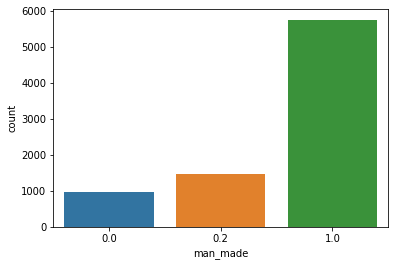

In [ ]:
import seaborn as sns

def check_man(x):
  if x in label_meta[b'label_map'][b'large_man-made_outdoor_things']:
    return 1
  elif x in label_meta[b'label_map'][b'people']:
    return 0
  else: 
    return 0.2


class_df = pd.DataFrame({'class':np.argmax(preds, axis=1)})
df['class'] = class_df['class']
df['class_label'] = df.apply(lambda x: label_meta[b'fine_label_names'][x['class']], axis=1)
df['man_made'] = df.apply(lambda x: check_man(x.class_label), axis=1)

sns.countplot(x=df["man_made"])
plt.show()


gdf = df.groupby(['class_label']).count().reset_index()

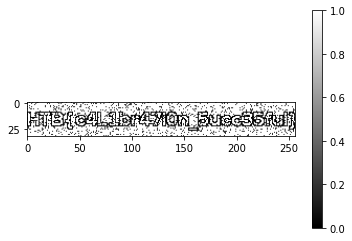

In [ ]:
flag = np.zeros((32,256))
df.sort_values('image_id', inplace=True, ascending=True)

l = df.man_made.to_list()
plt.imshow(np.reshape(l,(32,256)), cmap="gray")
plt.colorbar()
plt.show()


#Task 6 - Reading The Stars

In [ ]:
!unzip ml_reading_the_stars.zip
!unzip test.h5.zip

Archive:  ml_reading_the_stars.zip
  inflating: train.2.h5              
  inflating: __MACOSX/._train.2.h5   
  inflating: challenge.ipynb         
  inflating: __MACOSX/._challenge.ipynb  
  inflating: mask.png                
  inflating: __MACOSX/._mask.png     
  inflating: model.py                
  inflating: __MACOSX/._model.py     
  inflating: test.h5.zip             
  inflating: __MACOSX/._test.h5.zip  
  inflating: train.1.h5              
  inflating: __MACOSX/._train.1.h5   


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
from torch import nn
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Normalize(
        mean=np.array([0.1086, 0.0934, 0.0711]),
        std=np.array([0.1472, 0.123, 0.1032]))
])

import h5py

SEED = 1337
torch.manual_seed(SEED)
np.random.seed(SEED)
torch.use_deterministic_algorithms(True)

from model import StarChartModel, StarData

In [138]:
with h5py.File("train.1.h5", "r") as F:
    train_images1 = np.array(F["X"])
    train_labels1 = np.array(F["y"])
with h5py.File("train.2.h5", "r") as F:
    train_images2 = np.array(F["X"])
    train_labels2 = np.array(F["y"])
train_images = np.concatenate((train_images1, train_images2))
train_labels = np.concatenate((train_labels1, train_labels2))



In [139]:
batch_size = 32
from  sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=1337)

train_set = StarData((train_images.transpose(0,3,1,2)/255), train_labels, transform=preprocess)
val_set = StarData((val_images.transpose(0,3,1,2)/255), val_labels, transform=preprocess)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
    shuffle=True, num_workers=1, pin_memory=True)

val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,
    shuffle=True, num_workers=1, pin_memory=True)



In [140]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(dev)
model = StarChartModel([0.3,0.15])
model.train()
#model.to(dev)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.0005)

cuda


In [141]:
def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels, labels2 = data
        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_func(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 10 == 9:
            last_loss = running_loss / 1000 # loss per batch
            running_loss = 0.
    print('  loss: {}'.format(last_loss))
    return last_loss

def accuracy():
      model.eval()
      total_correct = 0
      total_instances = 0
      for i, data in enumerate(val_loader):
        input, labels, labels2 = data
        #input = torch.tensor((np.expand_dims(images, axis=0).transpose(0,3,1,2)/255)).float()
        predictions = model(input)
        predictions = torch.argmax(predictions, dim=1)

        correct_predictions = sum(predictions==labels2).item()
        total_correct+=correct_predictions
        total_instances+=len(input)
      return round(total_correct/total_instances, 3)

def val():
   with torch.no_grad():
        val_losses=[]
        for i, data in enumerate(val_loader):
          input, labels, labels2 = data
          #  sending data to device
          #  making predictions
          predictions = model(input)
          #  computing loss
          val_loss = loss_func(predictions, labels2)
          val_losses.append(val_loss.item())
        #  computing accuracy
        print('deriving validation accuracy...')
        val_accuracy = accuracy()
        val_losses = np.array(val_losses).mean()

        print(f'validation_loss: {round(val_losses, 4)} ')
        print(f'validation_accuracy: {val_accuracy}\n')


Epoch: 0
  loss: 0.005949030101299286
deriving validation accuracy...
validation_loss: 0.5772 
validation_accuracy: 0.75

<KeysViewHDF5 ['X']>


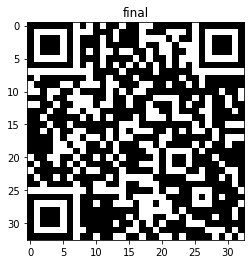

Epoch: 1
  loss: 0.004401644051074982
Epoch: 2
  loss: 0.004092145919799805
Epoch: 3
  loss: 0.004255271732807159
Epoch: 4
  loss: 0.0038953581154346465
Epoch: 5
  loss: 0.003785340338945389
deriving validation accuracy...
validation_loss: 0.3971 
validation_accuracy: 0.914

<KeysViewHDF5 ['X']>


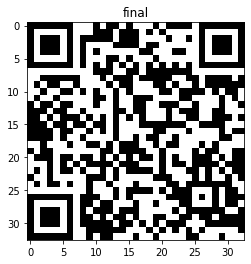

Epoch: 6
  loss: 0.0037494721710681915
Epoch: 7
  loss: 0.0037642168998718263
Epoch: 8
  loss: 0.003794393479824066
Epoch: 9
  loss: 0.0036395952105522157
Epoch: 10
  loss: 0.0036542771458625794
deriving validation accuracy...
validation_loss: 0.3867 
validation_accuracy: 0.923

<KeysViewHDF5 ['X']>


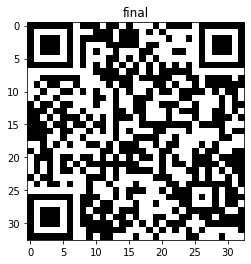

Epoch: 11
  loss: 0.003855012774467468
Epoch: 12
  loss: 0.003518670916557312
Epoch: 13
  loss: 0.0034107271432876588
Epoch: 14
  loss: 0.0034694148898124695
Epoch: 15
  loss: 0.0035475292205810545
deriving validation accuracy...
validation_loss: 0.3854 
validation_accuracy: 0.926

<KeysViewHDF5 ['X']>


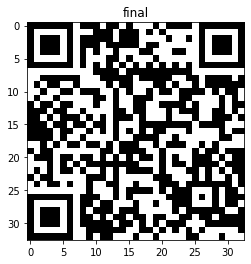

Epoch: 16
  loss: 0.0034621195793151857
Epoch: 17
  loss: 0.0034457713067531587
Epoch: 18
  loss: 0.00325850322842598
Epoch: 19
  loss: 0.0034538519084453584
Epoch: 20
  loss: 0.0035336311757564543
deriving validation accuracy...
validation_loss: 0.399 
validation_accuracy: 0.911

<KeysViewHDF5 ['X']>


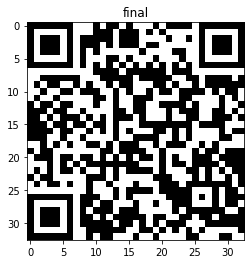

Epoch: 21
  loss: 0.0032925806641578674
Epoch: 22
  loss: 0.0034015674889087675
Epoch: 23
  loss: 0.003276733994483948
Epoch: 24
  loss: 0.0032748766243457794
Epoch: 25
  loss: 0.0032977090775966646
deriving validation accuracy...
validation_loss: 0.3721 
validation_accuracy: 0.942

<KeysViewHDF5 ['X']>


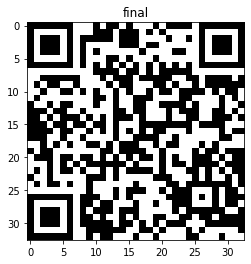

Epoch: 26
  loss: 0.003340806007385254
Epoch: 27


In [ ]:
from tqdm import tqdm

def predict():
  preds= None

  with h5py.File("test.h5", "r") as F:
    print(F.keys())
    test_images = np.array(F["X"])

  l1 = list()
  l2 = list()
  model.eval()
  test_images = test_images.reshape((1089,2,69, 69, 3))
  for idx, i in enumerate(test_images):
    input = torch.tensor((np.expand_dims(i[0], axis=0).transpose(0,3,1,2)/255)).float()
    outputs = model(preprocess(input))[0]
    
    l1.append(outputs.detach().numpy())

    input = torch.tensor((np.expand_dims(i[1], axis=0).transpose(0,3,1,2)/255)).float()
    outputs = model(preprocess(input))[0]
    
    l2.append(outputs.detach().numpy())

  preds1 = np.array(l1)
  preds2 = np.array(l2)
  return preds1, preds2

  def plt_code(res,mask):
    res = res.reshape(33,33,1)
    mask_2d = color.rgb2gray(mask)

    cond = ((mask[:,:,0] == 0) & (mask[:,:,1] != 255)) 

    res[cond] = np.expand_dims(mask_2d, axis=0).T[cond]

    cond = (mask[:,:,0] == 255) 

    res[cond] = np.expand_dims(mask_2d, axis=0).T[cond]

    plt.imshow(res, cmap='gray')
    plt.title("final")
    plt.show()


epochs = 35
print(train_loader)
model.train()
for i in range(epochs):
  print("Epoch:", i)
  train_one_epoch(i)

  if i %5==0:
    val()

  if i%5==0:
    preds1, preds2 = predict()
    flag = np.zeros((1089,1))

    flag = (preds1 * preds2)
    plt_code(flag.argmax(axis=1), mask)
